In [530]:
import pandas as pd
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
%matplotlib inline

# load data

In [3]:
%%bash
ls

EDA.ipynb
work
【ローデータ・GT表】2209_リサイクルPET価値調査(2回目).xlsx


In [9]:
sheetName_label = 'ﾗﾍﾞﾙ対応表'
df_label = pd.read_excel('./【ローデータ・GT表】2209_リサイクルPET価値調査(2回目).xlsx', sheetName_label)
df_label

,シート名,列番号,Unnamed: 2,ラベル,質問文,Unnamed: 5,質問_x000D_\nタイプ,カテゴリ数,カテゴリ_x000D_\nno,カテゴリ
0,1;group～q12,A,1.0,no,NaN,NaN,NaN,NaN,NaN,NaN
1,1;group～q12,B,2.0,group,GROUP,グループ,SA,20.0,1.0,ペットボトルに関する設問を 先に表示／男性／20-29歳
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ペットボトルに関する設問を 先に表示／男性／30-39歳
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,ペットボトルに関する設問を 先に表示／男性／40-49歳
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,ペットボトルに関する設問を 先に表示／男性／50-59歳
...,...,...,...,...,...,...,...,...,...,...
230,1;group～q12,CR,96.0,q12,Q12,あなたの環境問題への意識について、最も当てはまるものを１つだけお選びください。,SA,5.0,1.0,普段から環境問題を意識している
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,時々環境問題を意識している
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,たまに環境問題を意識することがある
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,あまり環境問題は意識することはない


In [7]:
sheetName = '1;group～q12'
df = pd.read_excel('./【ローデータ・GT表】2209_リサイクルPET価値調査(2回目).xlsx', sheetName)
df

,no,group,sc1,sc2_1,sc3,sc4,sc5,sc6,sc7-1,sc7-2,...,q10-16,q10-17,q10-18,q10-19,q10-20,q11_1,q11_2,q11_3,q11_4,q12
0,1,7,2,39,42,2,2,11,0,0,...,0,0,0,0,0,4,4,3,4,4
1,2,3,1,46,43,1,1,1,0,0,...,0,0,0,0,0,4,4,4,4,4
2,3,2,1,36,14,1,3,13,0,0,...,0,0,0,0,0,4,4,4,4,4
3,4,2,1,38,11,1,3,10,0,0,...,0,0,0,0,1,3,3,3,3,5
4,5,13,1,46,13,1,1,5,0,0,...,0,0,0,0,0,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,15,1,64,36,2,2,5,0,0,...,1,0,0,0,0,3,3,3,3,3
496,497,20,2,60,13,1,1,1,0,0,...,0,0,0,0,0,2,4,4,4,2
497,498,15,1,66,12,2,3,13,0,0,...,0,0,0,0,1,3,3,3,3,5
498,499,5,1,65,6,2,3,13,0,0,...,0,0,0,1,0,3,3,3,3,3


# explore important values

## [q3] RペットとVペットの選好

1 	Ｐ：リサイクル素材でできたもの  
2 	どちらかといえばＰ：リサイクル素材でできたもの  
3 	どちらでもかまわない  
4 	どちらかといえばＱ：従来の素材でできたもの  
5 	Ｑ：従来の素材でできたもの!  

In [63]:
tmp = df['q3'].value_counts().sort_index()
tmp_ratio = df['q3'].value_counts(normalize=True).sort_index()
pd.DataFrame({"count":tmp,"%":tmp_ratio*100})

,count,%
1,87,17.4
2,101,20.2
3,288,57.6
4,9,1.8
5,15,3.0


In [160]:
17.4+20.2

37.599999999999994

<AxesSubplot: title={'center': 'preference: R pet or V pet'}, xlabel='Answer', ylabel='Frequency'>

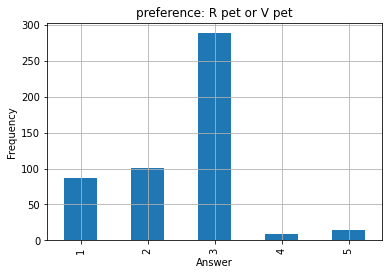

In [182]:
# RペットとVペットの選好

df['q3'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'preference: R pet or V pet',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

<AxesSubplot: title={'center': 'preference: R pet or V pet'}, ylabel='Frequency'>

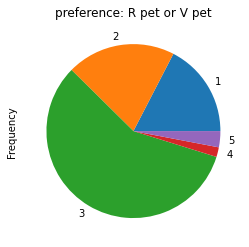

In [183]:
df['q3'].value_counts().sort_index().plot(
    kind = 'pie',
    title = 'preference: R pet or V pet',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

### [q4_1]Rペットに対する金銭的価値

前問で選んだものが選ばなかったものよりいくら高くなった時、選ばなかった方を選びますか。   
／【Ｐ：リサイクル素材でできたもの】が【Ｑ：従来の素材でできたもの】よりも／円高くなれば【Ｑ：従来の素材でできたもの】を選ぶ

<AxesSubplot: title={'center': 'virtual value of R pet'}, xlabel='amount', ylabel='Frequency'>

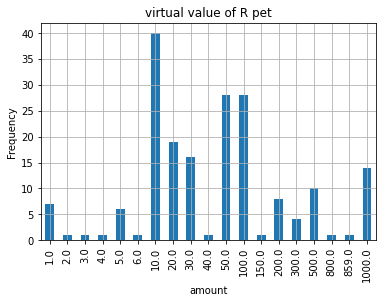

In [184]:
df['q4_1'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'virtual value of R pet',
    ylabel = 'Frequency',
    xlabel = 'amount',
    grid = True
)

In [194]:
df['q4_1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: q4_1
Non-Null Count  Dtype  
--------------  -----  
188 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [189]:
df['q4_1'].value_counts(normalize=True).sort_index()*100

1.0        3.723404
2.0        0.531915
3.0        0.531915
4.0        0.531915
5.0        3.191489
6.0        0.531915
10.0      21.276596
20.0      10.106383
30.0       8.510638
40.0       0.531915
50.0      14.893617
100.0     14.893617
150.0      0.531915
200.0      4.255319
300.0      2.127660
500.0      5.319149
800.0      0.531915
859.0      0.531915
1000.0     7.446809
Name: q4_1, dtype: float64

In [190]:
# 10~100円までの割合
21.2 +10.1 + 8.5 + 0.5 + 14.9 + 14.9

70.1

### [q8] RシャッツとVシャツの選好

1 	Ｐ：リサイクル素材でできたもの  
2 	どちらかといえばＰ：リサイクル素材でできたもの　　  
3 	どちらでもかまわない　　  
4 	どちらかといえばＱ：従来の素材でできたもの　　  
5 	Ｑ：従来の素材でできたもの　　  

In [64]:
tmp = df['q8'].value_counts().sort_index()
tmp_ratio = df['q8'].value_counts(normalize=True).sort_index()
pd.DataFrame({"count":tmp,"%":tmp_ratio*100})

,count,%
1,62,12.4
2,60,12.0
3,299,59.8
4,39,7.8
5,40,8.0


<AxesSubplot: title={'center': 'preference: R t-shirt or V t-shirt'}, xlabel='Answer', ylabel='Frequency'>

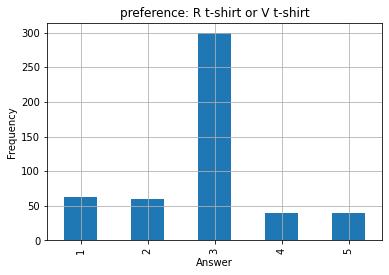

In [185]:
df['q8'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'preference: R t-shirt or V t-shirt',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

<AxesSubplot: title={'center': 'preference: R t-shirt or V t-shirt'}, ylabel='Frequency'>

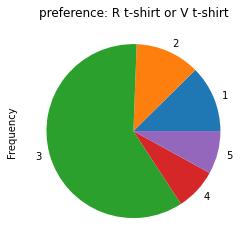

In [186]:
df['q8'].value_counts().sort_index().plot(
    kind = 'pie',
    title = 'preference: R t-shirt or V t-shirt',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

### [q9_1]Rペットに対する金銭的価値

前問で選んだものが選ばなかったものよりいくら高くなった時、選ばなかった方を選びますか。   
／【Ｐ：リサイクル素材でできたもの】が【Ｑ：従来の素材でできたもの】よりも／円高くなれば【Ｑ：従来の素材でできたもの】を選ぶ

<AxesSubplot: title={'center': 'virtual value of R t-shirt'}, xlabel='amount', ylabel='Frequency'>

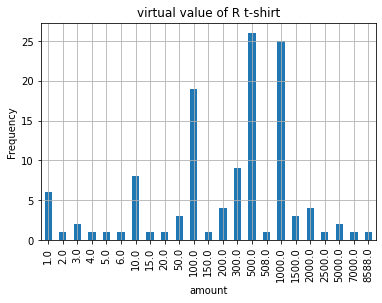

In [178]:
df['q9_1'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'virtual value of R t-shirt',
    ylabel = 'Frequency',
    xlabel = 'amount',
    grid = True
)

In [195]:
df['q9_1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: q9_1
Non-Null Count  Dtype  
--------------  -----  
122 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [196]:
df['q9_1'].value_counts(normalize=True)*100

500.0     21.311475
1000.0    20.491803
100.0     15.573770
300.0      7.377049
10.0       6.557377
1.0        4.918033
200.0      3.278689
2000.0     3.278689
1500.0     2.459016
50.0       2.459016
5000.0     1.639344
3.0        1.639344
7000.0     0.819672
6.0        0.819672
508.0      0.819672
150.0      0.819672
20.0       0.819672
8588.0     0.819672
15.0       0.819672
2.0        0.819672
2500.0     0.819672
4.0        0.819672
5.0        0.819672
Name: q9_1, dtype: float64

### [q3] & [q8]: 各製品でのR/V選好の重複を見る

In [116]:
pd.crosstab(df['q3'], df['q8'], colnames=["t-shirt"], rownames=["pet bottle"])

t-shirt,1,2,3,4,5
pet bottle,,,,,
1,39,13,26,4,5
2,15,35,37,11,3
3,7,10,231,19,21
4,0,0,3,2,4
5,1,2,2,3,7


In [114]:
# percentage in all
pd.crosstab(df['q3'], df['q8'], colnames=["t-shirt"], rownames=["pet bottle"], normalize="all")*100

t-shirt,1,2,3,4,5
pet bottle,,,,,
1,7.8,2.6,5.2,0.8,1.0
2,3.0,7.0,7.4,2.2,0.6
3,1.4,2.0,46.2,3.8,4.2
4,0.0,0.0,0.6,0.4,0.8
5,0.2,0.4,0.4,0.6,1.4


In [113]:
# percentage in row
pd.crosstab(df['q3'], df['q8'], colnames=["t-shirt"], rownames=["pet bottle"], normalize="index")*100

t-shirt,1,2,3,4,5
pet bottle,,,,,
1,44.827586,14.942529,29.885057,4.597701,5.747126
2,14.851485,34.653465,36.633663,10.891089,2.970297
3,2.430556,3.472222,80.208333,6.597222,7.291667
4,0.000000,0.000000,33.333333,22.222222,44.444444
5,6.666667,13.333333,13.333333,20.000000,46.666667


In [112]:
# percentage in column
pd.crosstab(df['q3'], df['q8'], colnames=["t-shirt"], rownames=["pet bottle"], normalize="columns")*100

t-shirt,1,2,3,4,5
pet bottle,,,,,
1,62.903226,21.666667,8.695652,10.256410,12.5
2,24.193548,58.333333,12.374582,28.205128,7.5
3,11.290323,16.666667,77.257525,48.717949,52.5
4,0.000000,0.000000,1.003344,5.128205,10.0
5,1.612903,3.333333,0.668896,7.692308,17.5


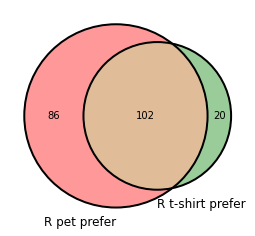

In [155]:
plt.title('number of people answered 1 or 2');

# どちらもR選好（1or2）
both_r = 39+13+15+35
# Petに対してR選好（1 or 2）
pet_r = 87+101
# Tシャツに対しててR選好（1 or 2）
shirt_r = 62 + 60

venn2(
    subsets=(pet_r-both_r, shirt_r-both_r, both_r),
    set_labels = ('R pet prefer', 'R t-shirt prefer')
)

venn2_circles(
    subsets=(pet_r-both_r, shirt_r-both_r, both_r),
    linestyle = 'solid'
)

In [216]:
# Aグループ内での重複者の割合
102/(102+20)*100

83.60655737704919

In [217]:
# Bグループ内での重複者の割合
102/(86+102)*100

54.25531914893617

In [218]:
86+102+20

208

# for Sankey Diagram

### [] 環境に対する意識・配慮的行動によるグループ分け。



In [222]:
#環境問題への意識
df['q12'].value_counts(normalize=True).sort_index()*100

1     9.4
2    26.6
3    34.0
4    17.4
5    12.6
Name: q12, dtype: float64

<AxesSubplot: xlabel='Answer', ylabel='Frequency'>

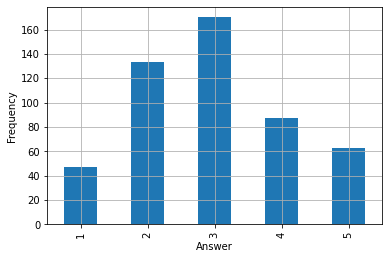

In [276]:
df['q12'].value_counts().sort_index().plot(
    kind = 'bar',
    title = '',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)


<AxesSubplot: ylabel='Frequency'>

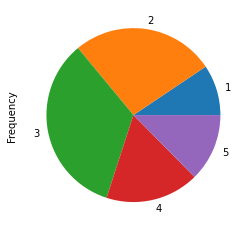

In [277]:
df['q12'].value_counts().sort_index().plot(
    kind = 'pie',
    title = '',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

In [295]:
# both R選好

len(df[ (df['q12']<4) & (df['sum_points'] > 6)])

,no,group,sc1,sc2_1,sc3,sc4,sc5,sc6,sc7-1,sc7-2,...,q10-17,q10-18,q10-19,q10-20,q11_1,q11_2,q11_3,q11_4,q12,sum_points
0,1,7,2,39,42,2,2,11,0,0,...,0,0,0,0,4,4,3,4,4,4
1,2,3,1,46,43,1,1,1,0,0,...,0,0,0,0,4,4,4,4,4,2
2,3,2,1,36,14,1,3,13,0,0,...,0,0,0,0,4,4,4,4,4,5
3,4,2,1,38,11,1,3,10,0,0,...,0,0,0,1,3,3,3,3,5,0
4,5,13,1,46,13,1,1,5,0,0,...,0,0,0,0,3,3,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,15,1,64,36,2,2,5,0,0,...,0,0,0,0,3,3,3,3,3,4
496,497,20,2,60,13,1,1,1,0,0,...,0,0,0,0,2,4,4,4,2,8
497,498,15,1,66,12,2,3,13,0,0,...,0,0,0,1,3,3,3,3,5,0
498,499,5,1,65,6,2,3,13,0,0,...,0,0,1,0,3,3,3,3,3,4


In [ ]:
#環境配慮的行動　の合計を出す （q10_20は"特に当てはまるものがない"なので省いている。）
new_col  = df.iloc[:,71:90].sum(axis=1).tolist()
df['sum_points'] = new_col

### 環境問題を意識している層　条件： (q12の回答) < 4 

1 	普段から環境問題を意識している  
2 	時々環境問題を意識している  
3 	たまに環境問題を意識することがある  
4 	あまり環境問題は意識することはない  
5 	全く環境問題は意識していない  

## Step.1＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

In [320]:
# 意識している(1,2,3)かつ、環境配慮行動ヘビー層（7個以上）　
len(df[ (df['q12']<4) & (df['sum_points'] > 6)])

104

In [321]:
# 意識している(1,2,3)かつ、環境配慮行動ミドル層以下（6個以下）　
len(df[ (df['q12']<4) & (df['sum_points'] < 7)])

246

In [323]:
# 意識していない層(4,5)　かつ、環境配慮行動ヘビー層（7個以上）　
len(df[ (df['q12']>3) & (df['sum_points'] > 6)])

6

In [324]:
# 意識していない層(4,5)　かつ、環境配慮行動ミドル層以下（6個以下）　
len(df[ (df['q12']>3) & (df['sum_points'] < 7)])

144

## Step.2＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

### Step.2-1

In [346]:
# 環境配慮行動ヘビー層（7個以上）　かつ、both R選好
len(df[ (df['sum_points'] > 6) & (df['q3']<3) & (df['q8']<3)])

22

In [360]:
# 環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好
len(df[ (df['sum_points'] > 6) & (df['q3']<3) & (df['q8'] >2)])

29

In [361]:
# 環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好
len(df[ (df['sum_points'] > 6) & (df['q3']>2) &  (df['q8']<3)])

4

In [362]:
# 環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし
len(df[ (df['sum_points'] > 6) & (df['q3'] > 2) & (df['q8'] > 2)])

55

### Step.2-2

In [363]:
# 環境配慮行動層ミドル層以下（6個以下）かつ、both R選好
len(df[  (df['sum_points'] < 7) &  (df['q8']<3) &  (df['q3']<3)])

80

In [364]:
# 環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好
len(df[ (df['sum_points'] < 7) &  (df['q3']<3) & (df['q8'] > 2)])

57

In [365]:
# 環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好
len(df[ (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8']<3)])

16

In [366]:
# 環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし
len(df[ (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8'] > 2)])

237

# ==============================

### Sankey Diagramでは表せない全体を通したグループ間の割合を出す。

In [371]:
# α①：意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好
print('意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8']<3)]))
print()

# β①：意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好
print(' 意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8'] >2)]))
print()

# θ①：意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好
print('意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3']>2) &  (df['q8']<3)]))
print()

# δ①：意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし
print('意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし')
print(len(df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3'] > 2) & (df['q8'] > 2)]))
print()

意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好
22

 意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好
28

意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好
3

意識している（1,2,3）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし
51



In [378]:
# 上の数字を%にすると。
a=22
b=28
c=3
d=51
total = a+b+c+d
print(a/total * 100)
print(b/total * 100)
print(c/total * 100)
print(d/total * 100)

21.153846153846153
26.923076923076923
2.8846153846153846
49.03846153846153


In [388]:
# α②：意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好
print('意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] < 7) &  (df['q8']<3) &  (df['q3']<3)]))
print()

# β②：意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好
print('意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] < 7) &  (df['q3']<3) & (df['q8'] > 2)]))
print()

# θ②：意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好
print('意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好')
print(len(df[ (df['q12']<4) & (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8']<3)]))
print()

# δ②：意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし
print('意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし')
print(len(df[ (df['q12']<4) & (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8'] > 2)]))
print()

意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好
56

意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好
47

意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好
11

意識している（1,2,3）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし
132



In [389]:
# 上の数字を%にすると。
a=56
b=47
c=11
d=132
total = a+b+c+d
print(a/total * 100)
print(b/total * 100)
print(c/total * 100)
print(d/total * 100)

22.76422764227642
19.10569105691057
4.471544715447155
53.65853658536586


In [374]:
# α③：意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好
print('意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8']<3)]))
print()

# β③：意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好
print(' 意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8'] >2)]))
print()

# θ③：意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好
print('意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] > 6) & (df['q3']>2) &  (df['q8']<3)]))
print()

# δ③意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし
print('意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし')
print(len(df[ (df['q12']>3) & (df['sum_points'] > 6) & (df['q3'] > 2) & (df['q8'] > 2)]))
print()

意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both R選好
0

 意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rペットのみ選好
1

意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、 Rシャツ　のみ選好
1

意識していない（4,5）かつ、環境配慮行動ヘビー層（7個以上）　かつ、both 従来素材選好or選好なし
4



In [390]:
# 上の数字を%にすると。
a=0
b=1
c=1
d=4
total = a+b+c+d
print(a/total * 100)
print(b/total * 100)
print(c/total * 100)
print(d/total * 100)

0.0
16.666666666666664
16.666666666666664
66.66666666666666


In [375]:
# α④：意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好
print('意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] < 7) &  (df['q8']<3) &  (df['q3']<3)]))
print()

# β④：意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好
print('意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] < 7) &  (df['q3']<3) & (df['q8'] > 2)]))
print()

# θ④：意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好
print('意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好')
print(len(df[ (df['q12']>3) & (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8']<3)]))
print()

# δ④：意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし
print('意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし')
print(len(df[ (df['q12']>3) & (df['sum_points'] < 7) & (df['q3'] > 2) & (df['q8'] > 2)]))
print()

意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both R選好
24

意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rペットのみ選好
10

意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、Rシャツのみ選好
5

意識していない（4,5）かつ、環境配慮行動層ミドル層以下（6個以下）かつ、both 従来素材選好or選好なし
105



In [391]:
# 上の数字を%にすると。
a=24
b=10
c=5
d=105
total = a+b+c+d
print(a/total * 100)
print(b/total * 100)
print(c/total * 100)
print(d/total * 100)

16.666666666666664
6.944444444444445
3.4722222222222223
72.91666666666666


In [398]:
# 結果から見た①〜④の割合

# α
alpha_total = 22 + 56 + 0 + 24
print('α')
print('①： ', 22 /alpha_total*100)
print('②： ', 56 /alpha_total*100)
print('③： ', 0 /alpha_total*100)
print('④： ', 24 /alpha_total*100)
print()

# β
beta_total = 28 + 47 + 1 + 10
print('β')
print('①： ', 28 /beta_total*100)
print('②： ', 47 /beta_total*100)
print('③： ', 1 /beta_total*100)
print('④： ', 10 /beta_total*100)
print()

# δ
delta_total = 51 + 132 + 4 + 105
print('δ')
print('①： ', 51 /delta_total*100)
print('②： ', 132 /delta_total*100)
print('③： ', 4 /delta_total*100)
print('④： ', 105 /delta_total*100)
print()

# θ
siita_total = 3 + 11 + 1 + 5
print('θ')
print('①： ', 3 /siita_total*100)
print('②： ', 11 /siita_total*100)
print('③： ', 1 /siita_total*100)
print('④： ', 5 /siita_total*100)
print()


α
①：  21.568627450980394
②：  54.90196078431373
③：  0.0
④：  23.52941176470588

β
①：  32.55813953488372
②：  54.65116279069767
③：  1.1627906976744187
④：  11.627906976744185

δ
①：  17.465753424657535
②：  45.20547945205479
③：  1.36986301369863
④：  35.95890410958904

θ
①：  15.0
②：  55.00000000000001
③：  5.0
④：  25.0



In [401]:
alpha_1 = 21.6
alpha_2 = 54.9
alpha_3 = 0
alpha_4 = 23.5

beta_1 = 32.6
beta_2 = 54.7
beta_3 = 1.2
beta_4 = 11.6

theta_1 = 15
theta_2 = 55
theta_3 = 5
theta_4 = 25

delta_1 = 17.5
delta_2 = 45.2
delta_3 = 1.4
delta_4 = 36

# α - β
print('α - β')
print('①: ', beta_1-alpha_1)
print('②: ', beta_2-alpha_2)
print('③: ', beta_3-alpha_3)
print('④: ', beta_4-alpha_4)
print()

# α - θ
print('α - θ')
print('①: ', theta_1-alpha_1)
print('②: ', theta_2-alpha_2)
print('③: ', theta_3-alpha_3)
print('④: ', theta_4-alpha_4)
print()

# α - δ
print('α - δ')
print('①: ', delta_1-alpha_1)
print('②: ', delta_2-alpha_2)
print('③: ', delta_3-alpha_3)
print('④: ', delta_4-alpha_4)
print()

α - β
①:  11.0
②:  -0.19999999999999574
③:  1.2
④:  -11.9

α - θ
①:  -6.600000000000001
②:  0.10000000000000142
③:  5
④:  1.5

α - δ
①:  -4.100000000000001
②:  -9.699999999999996
③:  1.4
④:  12.5



### α①、β①に該当する被験者の、服の選好理由の差を調べる。

'q6_snt15_1'項目（その他：自由回答）は、全体で１件しか値がなかったので省いている。

出力は、各項目（購入理由）に該当する人数の合計。


あなたはＴシャツを購入する際にどのようなことを重視されますか。当てはまるものをすべてお選びください。Ｔシャツを購入しない方は買うとすればということでお考え下さい。

1 	価格が手ごろであること  
2 	デザインや色・柄  
3 	ブランドやメーカー  
4 	着心地のよさ  
5 	素材  
6 	耐久性  
7 	吸湿速乾などの機能性  
8 	自分に合うサイズがあること  
9 	ショップの雰囲気や気持ちのいい店員がいること  
10 	インターネットで買うことができること  
11 	縫製などの品質  
12 	生産国  
13 	リサイクル素材を使っていること  
14 	環境に配慮した製品であること  
15 	その他  
16 	特に重視するものはない  

In [417]:
df['q6_snt15_1'].value_counts()

購入者の評価    1
Name: q6_snt15_1, dtype: int64

In [538]:
# α①にあたる被験者のTシャツの購買理由['q6-1' ~ 'q6_snt15_1']。
df_alpha_1 = df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8']<3)].iloc[:, 50:66]

lst_alpha1_col = []
lst_alpha1_value = []

for c in df_alpha_1.columns:
    lst_alpha1_col.append(c)
    
    if len(df_alpha_1[c].value_counts().index.values) == 1:
        print("---- %s ---" %c, 0)
        lst_alpha1_value.append(0)
    else:
        count_of_1 = df_alpha_1[c].value_counts()[1]
        print("---- %s ---" %c, count_of_1)
        lst_alpha1_value.append(count_of_1)

---- q6-1 --- 14
---- q6-2 --- 16
---- q6-3 --- 5
---- q6-4 --- 15
---- q6-5 --- 11
---- q6-6 --- 5
---- q6-7 --- 6
---- q6-8 --- 13
---- q6-9 --- 1
---- q6-10 --- 1
---- q6-11 --- 6
---- q6-12 --- 2
---- q6-13 --- 0
---- q6-14 --- 2
---- q6-15 --- 0
---- q6-16 --- 0


In [539]:
# # β①にあたる被験者のTシャツの購買理由。['q6-1' ~ 'q6_snt15_1']。
df_beta_1 = df[ (df['q12']<4) & (df['sum_points'] > 6) & (df['q3']<3) & (df['q8'] >2)].iloc[:, 50:66]

lst_beta1_col = []
lst_beta1_value = []

for c in df_beta_1.columns:
    lst_beta1_col.append(c)
    
    if len(df_beta_1[c].value_counts().index.values) == 1:
        print("---- %s ---" %c, 0)
        lst_beta1_value.append(9)
    else:
        value = df_beta_1[c].value_counts()[1]
        print("---- %s ---" %c, value)
        lst_beta1_value.append(value)

---- q6-1 --- 19
---- q6-2 --- 24
---- q6-3 --- 11
---- q6-4 --- 16
---- q6-5 --- 14
---- q6-6 --- 8
---- q6-7 --- 8
---- q6-8 --- 21
---- q6-9 --- 0
---- q6-10 --- 4
---- q6-11 --- 8
---- q6-12 --- 4
---- q6-13 --- 0
---- q6-14 --- 0
---- q6-15 --- 1
---- q6-16 --- 0


<AxesSubplot: title={'center': 'factors for purchasing T-shirt in α① and β①'}, xlabel='Answer', ylabel='ratio of Frequency'>

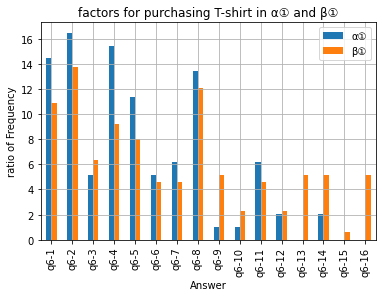

In [540]:
df_tmp = pd.DataFrame(
    {
        'α①': [v /sum(lst_alpha1_value) *100 for v in lst_alpha1_value], #絶対値を比べてもしょうがないので、%に変換。
        'β①': [v /sum(lst_beta1_value) *100 for v in lst_beta1_value]
    },
    index=lst_alpha1_col
)

df_tmp.plot(
    kind = 'bar',
    title = 'factors for purchasing T-shirt in α① and β①',
    ylabel = 'ratio of Frequency',
    xlabel = 'Answer',
    grid = True
)

In [541]:
alpha1_shirt_factor = [v /sum(lst_alpha1_value) *100 for v in lst_alpha1_value]
beta1_shirt_factor = [v /sum(lst_beta1_value) *100 for v in lst_beta1_value]

alpha1_shirt_factor = np.array(alpha1_shirt_factor)
beta1_shirt_factor = np.array(beta1_shirt_factor)

subtracted_array = np.subtract(beta1_shirt_factor, alpha1_shirt_factor)
subtracted = list(subtracted_array)

for i, v in enumerate(subtracted):
    print(lst_alpha1_col[i], ': ', v)

q6-1 :  -3.51344946083659
q6-2 :  -2.7017419125488793
q6-3 :  1.1671999052020396
q6-4 :  -6.268515226922622
q6-5 :  -3.2942291740727576
q6-6 :  -0.5569380258324443
q6-7 :  -1.5878658608839915
q6-8 :  -1.3330963384287244
q6-9 :  4.141485958051902
q6-10 :  1.2679227396610973
q6-11 :  -1.5878658608839915
q6-12 :  0.23699490460955097
q6-13 :  5.172413793103448
q6-14 :  3.110558123000356
q6-15 :  0.5747126436781609
q6-16 :  5.172413793103448


### αとθグループ間で、ペットボトルの購入理由の差を調べる。

'q2_snt11_1'項目（その他：自由回答）は、全体で4件でそれぞれの回答が異なっていたので省いている。

出力は、各項目（購入理由）に該当する人数の合計。

あなたはペットボトル飲料を購入する際にどのようなことを重視されますか。当てはまるものをすべてお選びください。ペットボトル飲料を購入しない方は買うとすればということでお考え下さい。

1 	価格が手ごろであること  
2 	メーカーやブランド  
3 	ボトルの形やデザイン  
4 	新製品であること  
5 	味や香りなど  
6 	原材料や産地など  
7 	容量  
8 	広告やキャンペーンなどの話題性  
9 	容器がリサイクル素材を用いていること    
10 	環境面への配慮がされていること  
11 	その他  
12 	特に重視するものはない  

In [455]:
df['q2_snt11_1'].value_counts()

カロリー                      1
ブラックコーヒーや緑茶               1
冷凍できるかどうか。                1
飲み物が手元になくて喉の渇きを満たしたい場合    1
Name: q2_snt11_1, dtype: int64

In [553]:
# αにあたる被験者のペットボトルの購買理由['q2-1' ~ 'q2-12']。
df_alpha = df[(df['q3']<3) & (df['q8']<3)].iloc[:, 33:45]

df_alpha_col = []
df_alpha_val = []

for c in df_alpha.columns:
    df_alpha_col.append(c)
    
    if len(df_alpha[c].value_counts().index.values) == 1:
        print("---- %s ---" %c, 0)
        df_alpha_val.append(0)
    else:
        value =  df_alpha[c].value_counts()[1]
        print("---- %s ---" %c, value)
        df_alpha_val.append(value)

---- q2-1 --- 40
---- q2-2 --- 23
---- q2-3 --- 8
---- q2-4 --- 6
---- q2-5 --- 35
---- q2-6 --- 7
---- q2-7 --- 34
---- q2-8 --- 8
---- q2-9 --- 9
---- q2-10 --- 5
---- q2-11 --- 1
---- q2-12 --- 17


In [554]:
# θにあたる被験者のペットボトルの購買理由['q2-1' ~ 'q2-12']。
df_theta = df[(df['q3']>2) & (df['q8']<3)].iloc[:, 33:45]

df_theta_col = []
df_theta_val = []

for c in df_theta.columns:
    df_theta_col.append(c)
    
    if len(df_theta[c].value_counts().index.values) == 1:
        print("---- %s ---" %c, 0)
        df_theta_val.append(0)
    else:
        value = df_theta[c].value_counts()[1]
        print("---- %s ---" %c, value)
        df_theta_val.append(value)

---- q2-1 --- 11
---- q2-2 --- 5
---- q2-3 --- 3
---- q2-4 --- 1
---- q2-5 --- 7
---- q2-6 --- 3
---- q2-7 --- 10
---- q2-8 --- 1
---- q2-9 --- 4
---- q2-10 --- 1
---- q2-11 --- 0
---- q2-12 --- 3


<AxesSubplot: title={'center': 'factors for purchasing pet bottle in α and θ'}, xlabel='Answer', ylabel='ratio of Frequency'>

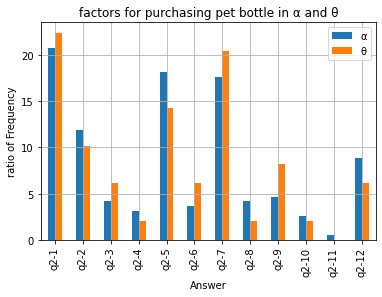

In [558]:
df_tmp = pd.DataFrame(
    {
        'α': [v /sum(df_alpha_val) *100 for v in df_alpha_val], #絶対値を比べてもしょうがないので、%に変換。
        'θ': [v /sum(df_theta_val) *100 for v in df_theta_val]
    },
    index=df_theta_col
)

df_tmp.plot(
    kind = 'bar',
    title = 'factors for purchasing pet bottle in α and θ',
    ylabel = 'ratio of Frequency',
    xlabel = 'Answer',
    grid = True
)

In [560]:
alpha_pet_factor = [v /sum(df_alpha_val) *100 for v in df_alpha_val]
theta_pet_factor = [v /sum(df_theta_val) *100 for v in df_theta_val]

alpha_pet_factor = np.array(alpha_pet_factor)
theta_pet_factor = np.array(theta_pet_factor)

subtracted_array = np.subtract(theta_pet_factor, alpha_pet_factor)
subtracted = list(subtracted_array)

for i, v in enumerate(subtracted):
    print(df_theta_col[i], ': ', v)

q2-1 :  1.7235909908004672
q2-2 :  -1.7130168129427936
q2-3 :  1.977371259384582
q2-4 :  -1.067991963624828
q2-5 :  -3.8490007401924515
q2-6 :  2.4955059744104897
q2-7 :  2.7915829544252944
q2-8 :  -2.104261393676642
q2-9 :  3.500052870889289
q2-10 :  -0.5498572485989213
q2-11 :  -0.5181347150259068
q2-12 :  -2.6858411758485774


# explore other data

### [sc8] 年収データ

1 	２００万円未満  
2 	２００万円以上－　５００万円未満  
3 	５００万円以上－　８００万円未満  
4 	８００万円以上－　１，０００万円未満  
5 	１，０００万円以上  
6 	わからない  

In [153]:
df['sc8'].value_counts(normalize=True).sort_index()*100

1    10.2
2    28.8
3    21.6
4     8.0
5    10.0
6    21.4
Name: sc8, dtype: float64

<AxesSubplot: title={'center': 'household income'}, xlabel='Answer', ylabel='icnome'>

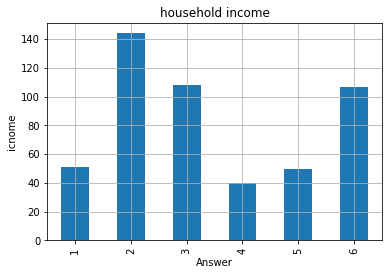

In [140]:
df['sc8'].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'household income',
    ylabel = 'icnome',
    xlabel = 'Answer',
    grid = True
)

### [sc8] & [sc5] 年収と同居人数のクロス集計

[sc5]  
1 	ひとり暮らし（同居している人はいない）  
2 	家族と同居（未成年の子どもあり）  
3 	家族と同居（未成年の子どもはいない）  
4 	家族以外の人と同居  
5 	その他

In [149]:
# percentage in column
pd.crosstab(df['sc8'], df['sc5'] ,colnames=["family type"], rownames=["house income"] )

family type,1,2,3,4,5
house income,,,,,
1,30,7,13,0,1
2,48,19,71,2,4
3,11,41,54,1,1
4,3,12,24,1,0
5,4,17,29,0,0
6,12,20,72,0,3


In [150]:
# percentage in column
pd.crosstab(df['sc8'], df['sc5'] ,colnames=["family type"], rownames=["house income"], normalize="all")*100

family type,1,2,3,4,5
house income,,,,,
1,6.0,1.4,2.6,0.0,0.2
2,9.6,3.8,14.2,0.4,0.8
3,2.2,8.2,10.8,0.2,0.2
4,0.6,2.4,4.8,0.2,0.0
5,0.8,3.4,5.8,0.0,0.0
6,2.4,4.0,14.4,0.0,0.6


### Tシャツの普段の購入金額

1 	１，０００円未満  
2 	１，０００円～１，９９９円  
3 	２，０００円～２，９９９円  
4 	３，０００円～３，９９９円  
5 	４，０００円～４，９９９円  
6 	５，０００円～５，９９９円  
7 	６，０００円～６，９９９円  
8 	７，０００円～７，９９９円  
9 	８，０００円～８，９９９円  
10 	９，０００円～９，９９９円  
11 	１０，０００円以上  
12 	わからない  

<AxesSubplot: xlabel='Answer', ylabel='Frequency'>

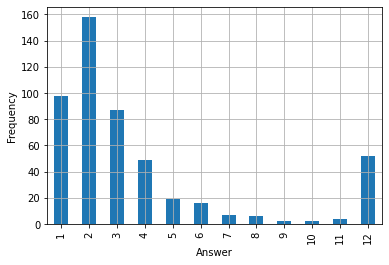

In [204]:
df['q7'].value_counts().sort_index().plot(
    kind = 'bar',
    title = '',
    ylabel = 'Frequency',
    xlabel = 'Answer',
    grid = True
)

In [207]:
df['q7'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: q7
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [202]:
df['q7'].value_counts(normalize=True).sort_index()*100

1     19.6
2     31.6
3     17.4
4      9.8
5      3.8
6      3.2
7      1.4
8      1.2
9      0.4
10     0.4
11     0.8
12    10.4
Name: q7, dtype: float64

In [206]:
#1000円未満~2,999円の割合
19.6+31.6+17.4

68.6